# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

### Load the dataset and check for missing values:

In [2]:
import pandas as pd
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Check for missing values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

## Data Exploration and Visualization:
### Pair Plot (Scatter Plot Matrix)

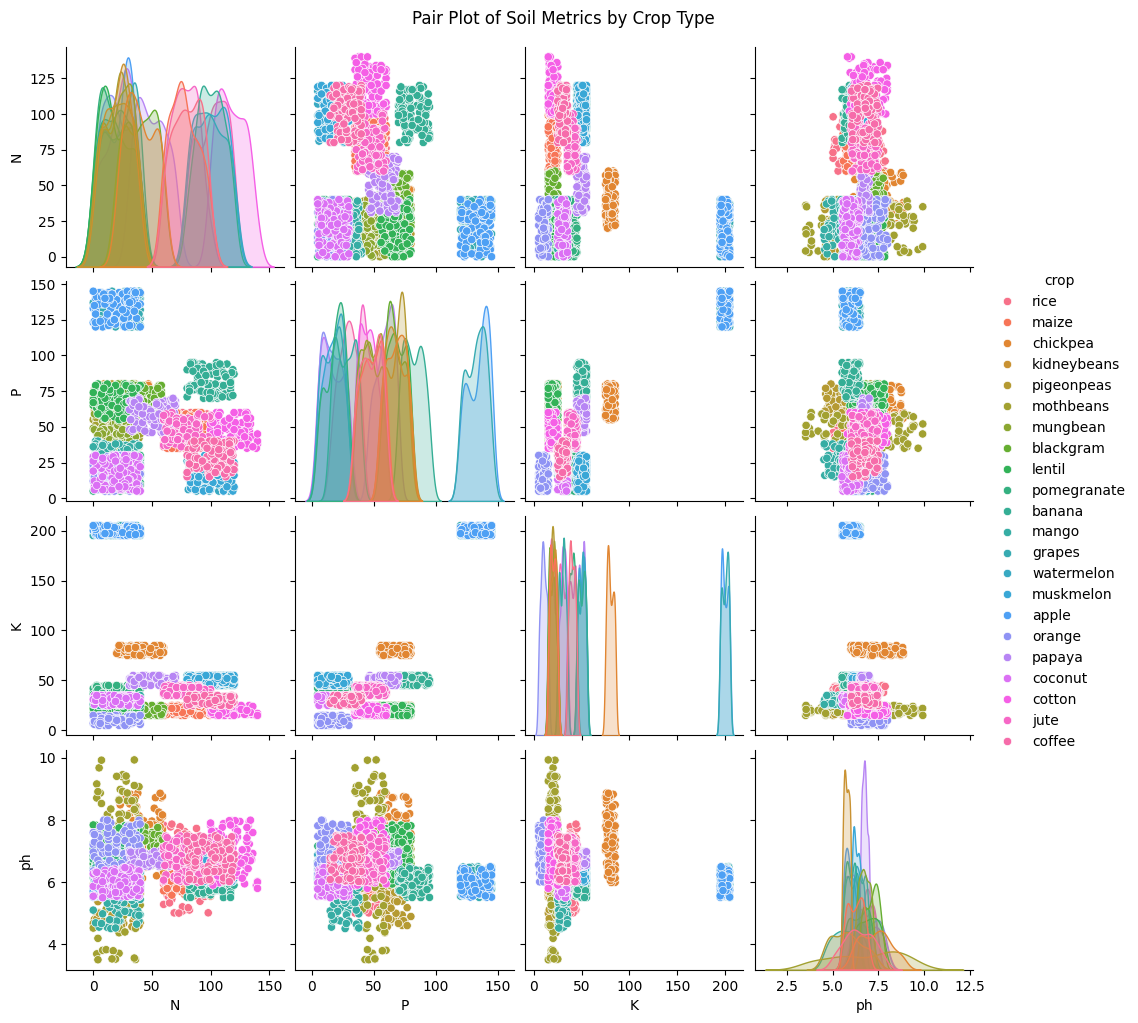

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(crops, hue="crop", diag_kind="kde")
plt.suptitle("Pair Plot of Soil Metrics by Crop Type", y=1.02)
plt.show()

### Output Analysis:
The pair plot visualizes the relationships between soil metrics (N, P, K, pH) and how they correlate with different crop types.
The scatter plots allow us to observe how different soil metrics are distributed across various crops.
The diagonal plots (KDEs) show the distribution of each soil metric.
By coloring the plots based on crop type, we can visually inspect if certain crops prefer specific ranges of soil metrics.
For instance, if one crop type clusters around high nitrogen values, it may indicate that this crop thrives in nitrogen-rich soil.

### Box Plot

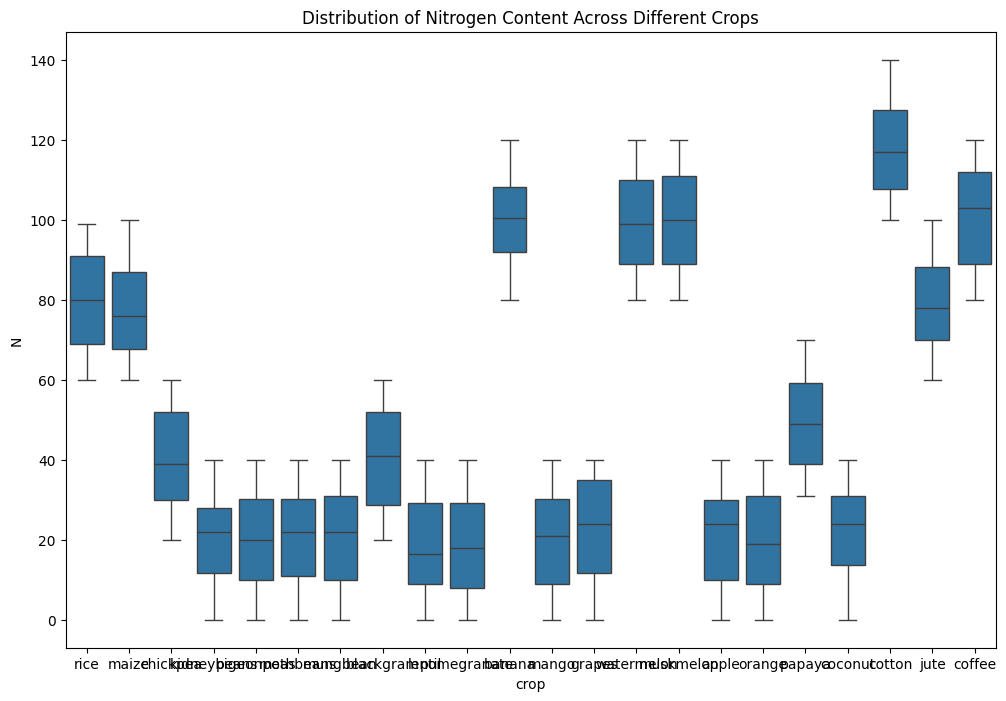

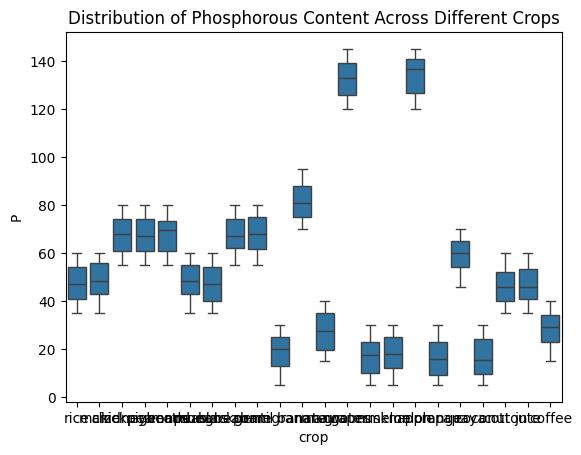

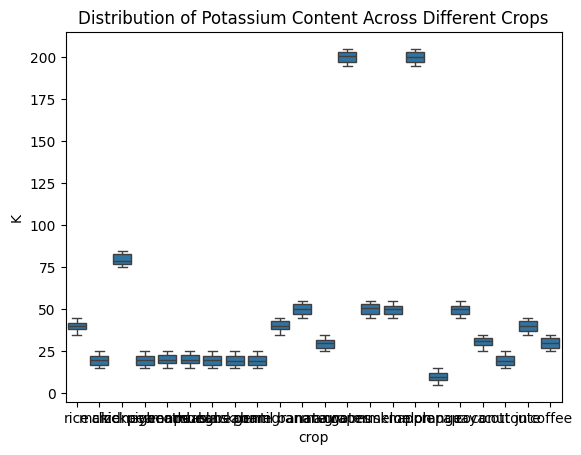

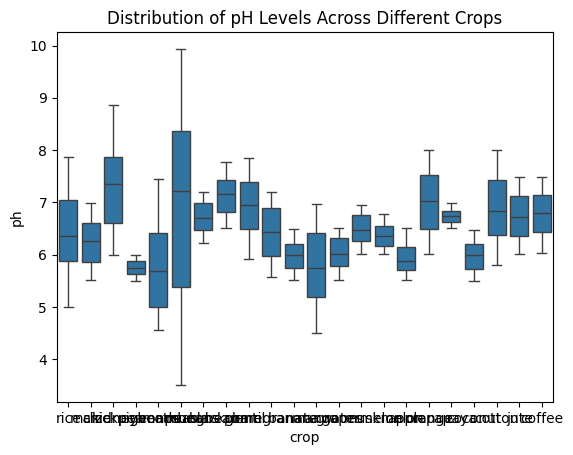

In [4]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="crop", y="N", data=crops)
plt.title("Distribution of Nitrogen Content Across Different Crops")
plt.show()

sns.boxplot(x="crop", y="P", data=crops)
plt.title("Distribution of Phosphorous Content Across Different Crops")
plt.show()

sns.boxplot(x="crop", y="K", data=crops)
plt.title("Distribution of Potassium Content Across Different Crops")
plt.show()

sns.boxplot(x="crop", y="ph", data=crops)
plt.title("Distribution of pH Levels Across Different Crops")
plt.show()

### Output Analysis:
Box plots are used to display the distribution of each soil metric (N, P, K, pH) for different crops, helping identify which metrics are more significant for certain crops.
Each box plot reveals the spread and central tendency of a soil metric for different crops.
The box's height shows the interquartile range, and the line inside the box indicates the median value.
Outliers, shown as individual points, may suggest exceptional cases.
By comparing box plots for each metric, we can identify whether specific crops have distinct soil requirements. For example, one crop might have a consistently higher median potassium content than others.


### Heatmap of Correlations

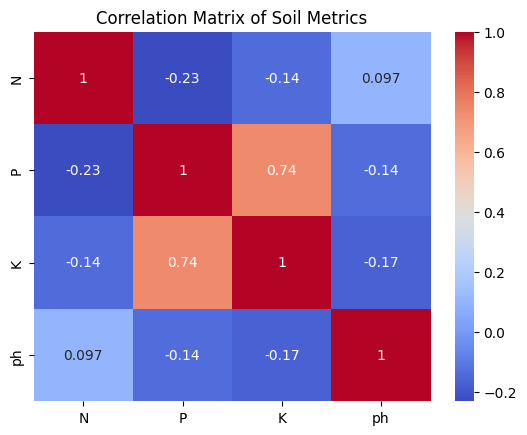

In [5]:
corr_matrix = crops.drop(columns="crop").corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Soil Metrics")
plt.show()


### Output Analysis:
The heatmap displays the correlation between the soil metrics, helping to identify any multicollinearity (high correlation between independent variables).
The heatmap uses color intensity to represent correlation values, with the correlation coefficient annotated on each cell.
High positive or negative correlations (close to 1 or -1) indicate a strong relationship between two metrics, while values near 0 suggest weak or no correlation.
If two soil metrics show a high correlation, such as nitrogen and potassium, it could suggest that one might be predictive of the other, potentially leading to multicollinearity issues.

## Logistic Regression Model
### 1. Feature Selection:
Why Logistic Regression? Logistic regression is well-suited for multi-class classification problems like this one, where the goal is to predict one of several crop types based on soil metrics. Its simplicity and interpretability make it a good first choice for evaluating the predictive power of individual features.

### 2. Model Training:
Training Process: The code trains a logistic regression model for each soil metric individually (N, P, K, and pH) to assess their predictive power. By focusing on one feature at a time, the model isolates the impact of each soil metric on crop prediction. The training is done using the fit method on the training set (X_train, y_train), and predictions are made on the test set (X_test).

### 3. Model Performance:
F1-Score Calculation: The performance of each model is evaluated using the F1-score, which balances precision and recall. This is particularly useful in cases where the dataset may have class imbalances. The F1-scores for each feature are stored in a dictionary (feature_performance) and printed out, allowing for comparison between the features.
Feature Comparison: Among the features tested, Potassium (K) produced the highest F1-score, indicating it is the most predictive soil metric for determining the crop type in this dataset. This information is captured in the best_predictive_feature dictionary.

In [12]:
# Import all required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Check for missing values
print(crops.isna().sum())

# Check how many crops we have, i.e., multi-class target
print(crops.crop.unique())

# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Create a dictionary to store the model performance for each feature
feature_performance = {}

# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(max_iter=500)
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    
    # Calculate F1 score, the harmonic mean of precision and recall
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    
    # Add feature-f1 score pairs to the dictionary
    feature_performance[feature] = f1
    print(f"F1-score for {feature}: {f1}")

# K produced the best F1 score
# Store in best_predictive_feature dictionary
best_predictive_feature = {"K": feature_performance["K"]}
print(best_predictive_feature)


N       0
P       0
K       0
ph      0
crop    0
dtype: int64
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
F1-score for N: 0.10093488278621562
F1-score for P: 0.09638559498707631
F1-score for K: 0.22942676045245142
F1-score for ph: 0.0458225366614312
{'K': np.float64(0.22942676045245142)}


### Bar Plot of F1-Scores

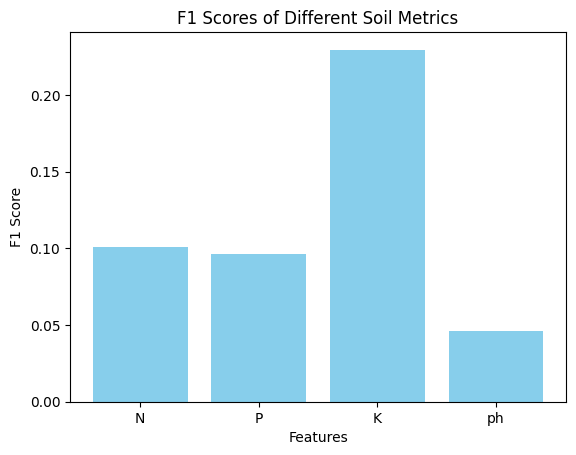

In [13]:
feature_names = list(feature_performance.keys())
f1_scores = list(feature_performance.values())

plt.bar(feature_names, f1_scores, color='skyblue')
plt.xlabel("Features")
plt.ylabel("F1 Score")
plt.title("F1 Scores of Different Soil Metrics")
plt.show()

### Output Analysis:
The bar plot visualizes the F1-scores for different features, allowing a quick comparison of their predictive power
Each bar represents the F1-score for a particular soil metric, calculated from the logistic regression model.
The higher the bar, the more predictive that feature is for determining the correct crop.
AS potassium (K) has the highest bar, it suggests that potassium is the most important soil metric for predicting crop type, as reflected by the F1-score.

### Confusion Matrix

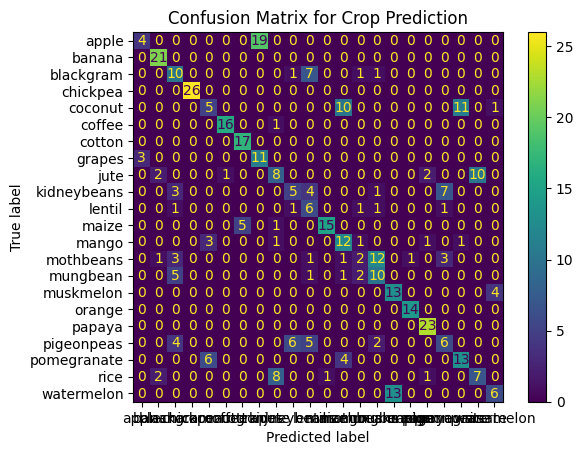

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

log_reg = LogisticRegression(multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Confusion Matrix for Crop Prediction")
plt.show()

### Confusion Matrix Output Analysis
The confusion matrix for crop prediction provides a detailed insight into the performance of the logistic regression model across different crop types. Here's an analysis based on the matrix:

### Diagonal Elements (Correct Predictions):

The diagonal elements represent the number of correct predictions for each crop. For example, the model correctly predicted "banana" 21 times, "chickpea" 26 times, and "pomegranate" 23 times. These values indicate that the model is fairly accurate in predicting these particular crops.

### Off-Diagonal Elements (Misclassifications):
Off-diagonal elements represent misclassifications, where the model predicted one crop type but the true label was another. For instance:
"Apple" was misclassified as "grapes" 19 times, suggesting that the model confuses these two crops, possibly due to similar soil metrics.
"Coffee" was confused with "cotton" 1 time and "grapes" 16 times, which indicates some overlap in the features used to distinguish these crops.

### Patterns of Confusion:
The matrix shows that certain crops like "grapes," "apple," and "mango" have higher rates of confusion with other crops, indicating that their soil metrics might not be distinctive enough for the model to differentiate them effectively.
Crops like "rice," "pigeonpeas," and "pomegranate" have relatively clear separations in the matrix, indicating the model performs well on these classes.

### Color Intensity:
The color intensity in the heatmap corresponds to the number of predictions. The brighter (yellow) cells on the diagonal indicate a higher number of correct predictions, while the darker cells represent fewer or no correct predictions.

### Areas of Improvement:
The model might benefit from additional feature engineering or the inclusion of more distinguishing features to reduce the confusion between certain crops like "apple" and "grapes."
Exploring advanced models or tuning hyperparameters could also help improve the accuracy for crops that are currently misclassified.

### Conclusion
This confusion matrix highlights that while the logistic regression model is generally effective at predicting certain crops, it struggles with others, particularly where the soil metrics overlap significantly. The analysis suggests a need for further refinement of the model to reduce misclassifications and improve overall accuracy.